# Capstone Project : Retail Sales Case Study

# Data Quality and Check (Task 1)
1. Create a consolidated view of data by joining the data present in three files.

In [1]:
import pandas as pd
import json

# Loading the datasets
demographic_df  = pd.read_csv("/Users/akhilnair/Downloads/demographics.txt", delimiter='\t')
demographic_df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,SP
...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,"$66,476.00",0,1,3/7/13,US
2236,5263,1977,2n Cycle,Married,"$31,056.00",1,0,1/22/13,SP
2237,22,1976,Graduation,Divorced,"$46,310.00",1,0,12/3/12,SP
2238,528,1978,Graduation,Married,"$65,819.00",0,0,11/29/12,IND


In [2]:
# Loading the JSON data
with open("/Users/akhilnair/Downloads/behaviour.json") as behaviour_file:
    behaviour_data = json.load(behaviour_file)
with open("/Users/akhilnair/Downloads/campaign.json") as campaign_file:
    campaign_data = json.load(campaign_file)

In [3]:
# Converting the JSON data to DataFrames
behaviour_list = [list(item.values())[0] for item in behaviour_data]
behaviour_ids = [list(item.keys())[0].replace('ID_', '') for item in behaviour_data]
behaviour_df = pd.DataFrame(behaviour_list)
behaviour_df['ID'] = behaviour_ids
behaviour_df

,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,ID
0,0,189,104,379,111,189,218,1,4,4,6,1,1826
1,0,464,5,64,7,0,37,1,7,3,7,5,1
2,0,134,11,59,15,2,30,1,3,2,5,2,10476
3,0,10,0,1,0,0,0,1,1,0,2,7,1386
4,0,6,16,24,11,0,34,2,3,1,2,7,5371
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,99,372,18,126,47,48,78,2,5,2,11,4,10142
2236,99,5,10,13,3,8,16,1,1,0,3,8,5263
2237,99,185,2,88,15,5,14,2,6,1,5,8,22
2238,99,267,38,701,149,165,63,1,5,4,10,3,528


In [4]:
campaign_list = [list(item.values())[0] for item in campaign_data]
campaign_ids = [list(item.keys())[0].replace('ID_', '') for item in campaign_data]
campaign_df = pd.DataFrame(campaign_list)
campaign_df['ID'] = campaign_ids
campaign_df

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Complain,ID
0,0,0,0,0,0,1,0,1826
1,0,1,0,0,0,1,0,1
2,0,0,0,0,0,0,0,10476
3,0,0,0,0,0,0,0,1386
4,0,0,1,0,0,1,0,5371
...,...,...,...,...,...,...,...,...
2235,0,0,0,0,0,0,0,10142
2236,0,0,0,0,0,0,0,5263
2237,0,0,0,0,0,0,0,22
2238,0,0,0,0,0,0,0,528


In [5]:
# Converting ID columns to string type for consistent joining
demographic_df['ID'] = demographic_df['ID'].astype(str)
behaviour_df['ID'] = behaviour_df['ID'].astype(str)
campaign_df['ID'] = campaign_df['ID'].astype(str)


# Merging the datasets on ID
consolidated_df = demographic_df.merge(behaviour_df, on='ID').merge(campaign_df, on='ID')

# Removing extra spaces in column names
consolidated_df.columns = consolidated_df.columns.str.strip()
consolidated_df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Country,Recency,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Complain
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,SP,0,...,4,6,1,0,0,0,0,0,1,0
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,CA,0,...,3,7,5,0,1,0,0,0,1,0
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,US,0,...,2,5,2,0,0,0,0,0,0,0
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,AUS,0,...,0,2,7,0,0,0,0,0,0,0
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,SP,0,...,1,2,7,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,"$66,476.00",0,1,3/7/13,US,99,...,2,11,4,0,0,0,0,0,0,0
2236,5263,1977,2n Cycle,Married,"$31,056.00",1,0,1/22/13,SP,99,...,0,3,8,0,0,0,0,0,0,0
2237,22,1976,Graduation,Divorced,"$46,310.00",1,0,12/3/12,SP,99,...,1,5,8,0,0,0,0,0,0,0
2238,528,1978,Graduation,Married,"$65,819.00",0,0,11/29/12,IND,99,...,4,10,3,0,0,0,0,0,0,0


In [6]:
# Handle missing values
consolidated_df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Country                 0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp1            0
AcceptedCmp2            0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
Response                0
Complain                0
dtype: int64

In [7]:
# Cleaning and converting the Income column
consolidated_df['Income'] = consolidated_df['Income'].replace('[\$,]', '', regex=True).astype(float)
consolidated_df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Country,Recency,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,SP,0,...,4,6,1,0,0,0,0,0,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,CA,0,...,3,7,5,0,1,0,0,0,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/14,US,0,...,2,5,2,0,0,0,0,0,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,5/11/14,AUS,0,...,0,2,7,0,0,0,0,0,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,4/8/14,SP,0,...,1,2,7,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,3/7/13,US,99,...,2,11,4,0,0,0,0,0,0,0
2236,5263,1977,2n Cycle,Married,31056.0,1,0,1/22/13,SP,99,...,0,3,8,0,0,0,0,0,0,0
2237,22,1976,Graduation,Divorced,46310.0,1,0,12/3/12,SP,99,...,1,5,8,0,0,0,0,0,0,0
2238,528,1978,Graduation,Married,65819.0,0,0,11/29/12,IND,99,...,4,10,3,0,0,0,0,0,0,0


In [8]:
consolidated_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   object 
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Country              2240 non-null   object 
 9   Recency              2240 non-null   int64  
 10  MntWines             2240 non-null   int64  
 11  MntFruits            2240 non-null   int64  
 12  MntMeatProducts      2240 non-null   int64  
 13  MntFishProducts      2240 non-null   int64  
 14  MntSweetProducts     2240 non-null   int64  
 15  MntGoldProds         2240 non-null   i

In [9]:
# Checking for duplicates
duplicates = consolidated_df.duplicated().sum()
duplicates

0

In [10]:
# Creating a data quality report for continuous variables
continuous_vars = [
    'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 
    'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 
    'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 
    'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 
    'NumWebVisitsMonth'
]

data_quality_report = pd.DataFrame(columns=[
    'Variable', 'MissingPercentage', 'ZeroPercentage', 'Mean', 
    '25thPercentile', '50thPercentile', '75thPercentile', '90thPercentile', 
    '95thPercentile', 'Min', 'Max'
])

for var in continuous_vars:
    missing_percentage = consolidated_df[var].isnull().mean() * 100
    zero_percentage = (consolidated_df[var] == 0).mean() * 100
    mean = consolidated_df[var].mean()
    percentiles = consolidated_df[var].quantile([0.25, 0.5, 0.75, 0.9, 0.95]).values
    min_val = consolidated_df[var].min()
    max_val = consolidated_df[var].max()
    
    data_quality_report = pd.concat([data_quality_report, pd.DataFrame({
        'Variable': [var],
        'MissingPercentage': [missing_percentage],
        'ZeroPercentage': [zero_percentage],
        'Mean': [mean],
        '25thPercentile': [percentiles[0]],
        '50thPercentile': [percentiles[1]],
        '75thPercentile': [percentiles[2]],
        '90thPercentile': [percentiles[3]],
        '95thPercentile': [percentiles[4]],
        'Min': [min_val],
        'Max': [max_val]
    })], ignore_index=True)

In [11]:
data_quality_report

,Variable,MissingPercentage,ZeroPercentage,Mean,25thPercentile,50thPercentile,75thPercentile,90thPercentile,95thPercentile,Min,Max
0,Year_Birth,0.000000,0.000000,1968.805804,1959.00,1970.0,1977.00,1984.0,1988.00,1893,1996
1,Income,1.071429,0.000000,52247.251354,35303.00,51381.5,68522.00,79844.0,84130.00,1730.0,666666.0
2,Kidhome,0.000000,57.723214,0.444196,0.00,0.0,1.00,1.0,1.00,0,2
3,Teenhome,0.000000,51.696429,0.506250,0.00,0.0,1.00,1.0,1.00,0,2
4,Recency,0.000000,1.250000,49.109375,24.00,49.0,74.00,89.0,94.00,0,99
5,MntWines,0.000000,0.580357,303.935714,23.75,173.5,504.25,822.1,1000.00,0,1493
6,MntFruits,0.000000,17.857143,26.302232,1.00,8.0,33.00,83.0,123.00,0,199
7,MntMeatProducts,0.000000,0.044643,166.950000,16.00,67.0,232.00,499.0,687.10,0,1725
8,MntFishProducts,0.000000,17.142857,37.525446,3.00,12.0,50.00,120.0,168.05,0,259
9,MntSweetProducts,0.000000,18.705357,27.062946,1.00,8.0,33.00,89.0,126.00,0,263


In [12]:
# Univariate analysis for categorical variables

# List of categorical columns
categorical_vars = ['Education', 'Marital_Status', 'Country']

# DataFrame to store the categorical variable report
categorical_report = pd.DataFrame(columns=['Variable', 'MissingPercentage', 'UniqueValues'])

for var in categorical_vars:
    missing_percentage = consolidated_df[var].isnull().mean() * 100
    unique_values = consolidated_df[var].nunique()
    
    categorical_report = pd.concat([categorical_report, pd.DataFrame({
        'Variable': [var],
        'MissingPercentage': [missing_percentage],
        'UniqueValues': [unique_values]
    })], ignore_index=True)

In [13]:
categorical_report

,Variable,MissingPercentage,UniqueValues
0,Education,0.0,5
1,Marital_Status,0.0,8
2,Country,0.0,8


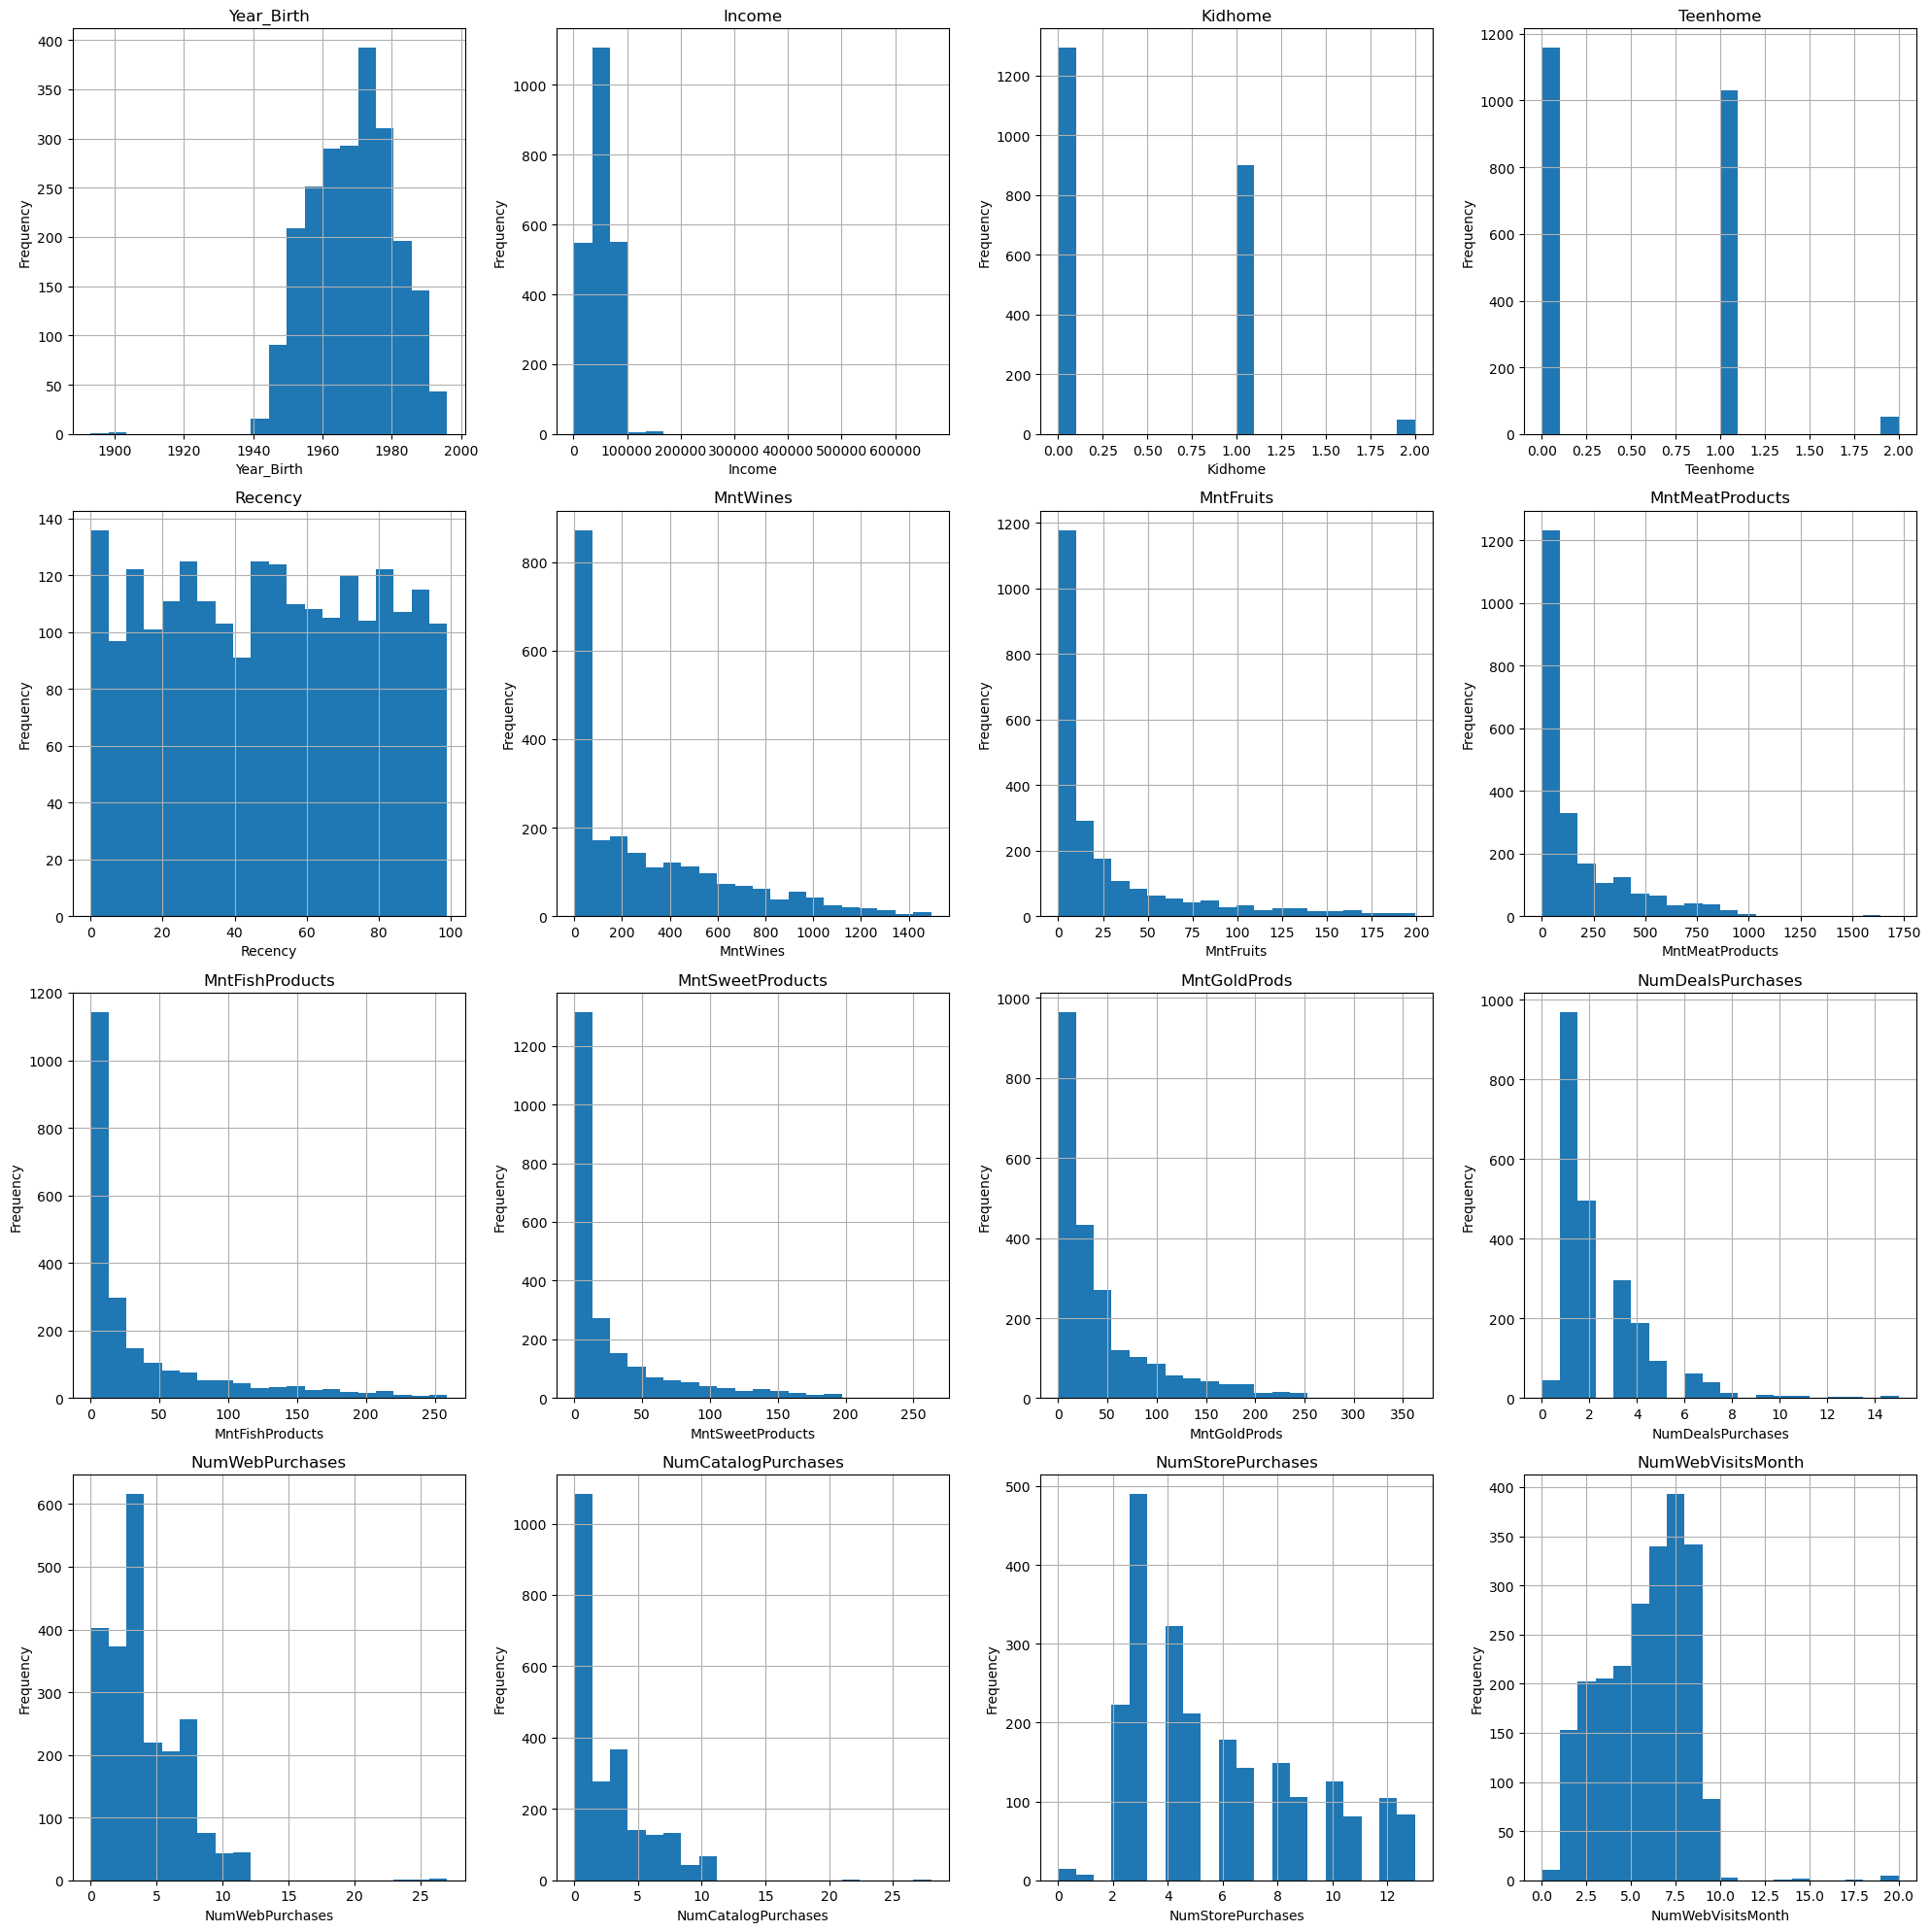

In [14]:
import matplotlib.pyplot as plt

# Ploting histograms for continuous variables
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))
axes = axes.flatten()

for idx, var in enumerate(continuous_vars):
    consolidated_df[var].hist(ax=axes[idx], bins=20)
    axes[idx].set_title(var)
    axes[idx].set_xlabel(var)
    axes[idx].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

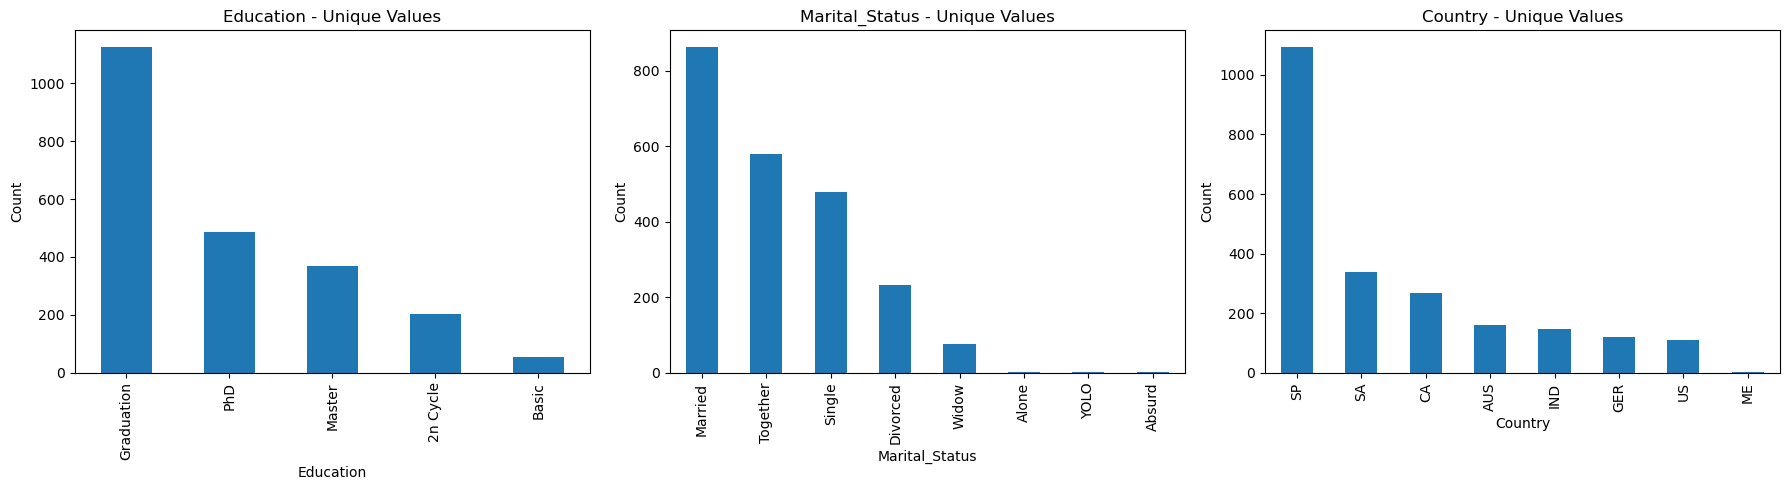

In [15]:
# Ploting bar plots for unique values in categorical variables
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

for idx, var in enumerate(categorical_vars):
    value_counts = consolidated_df[var].value_counts()
    value_counts.plot(kind='bar', ax=axes[idx])
    axes[idx].set_title(f'{var} - Unique Values')
    axes[idx].set_xlabel(var)
    axes[idx].set_ylabel('Count')

plt.tight_layout()
plt.show()

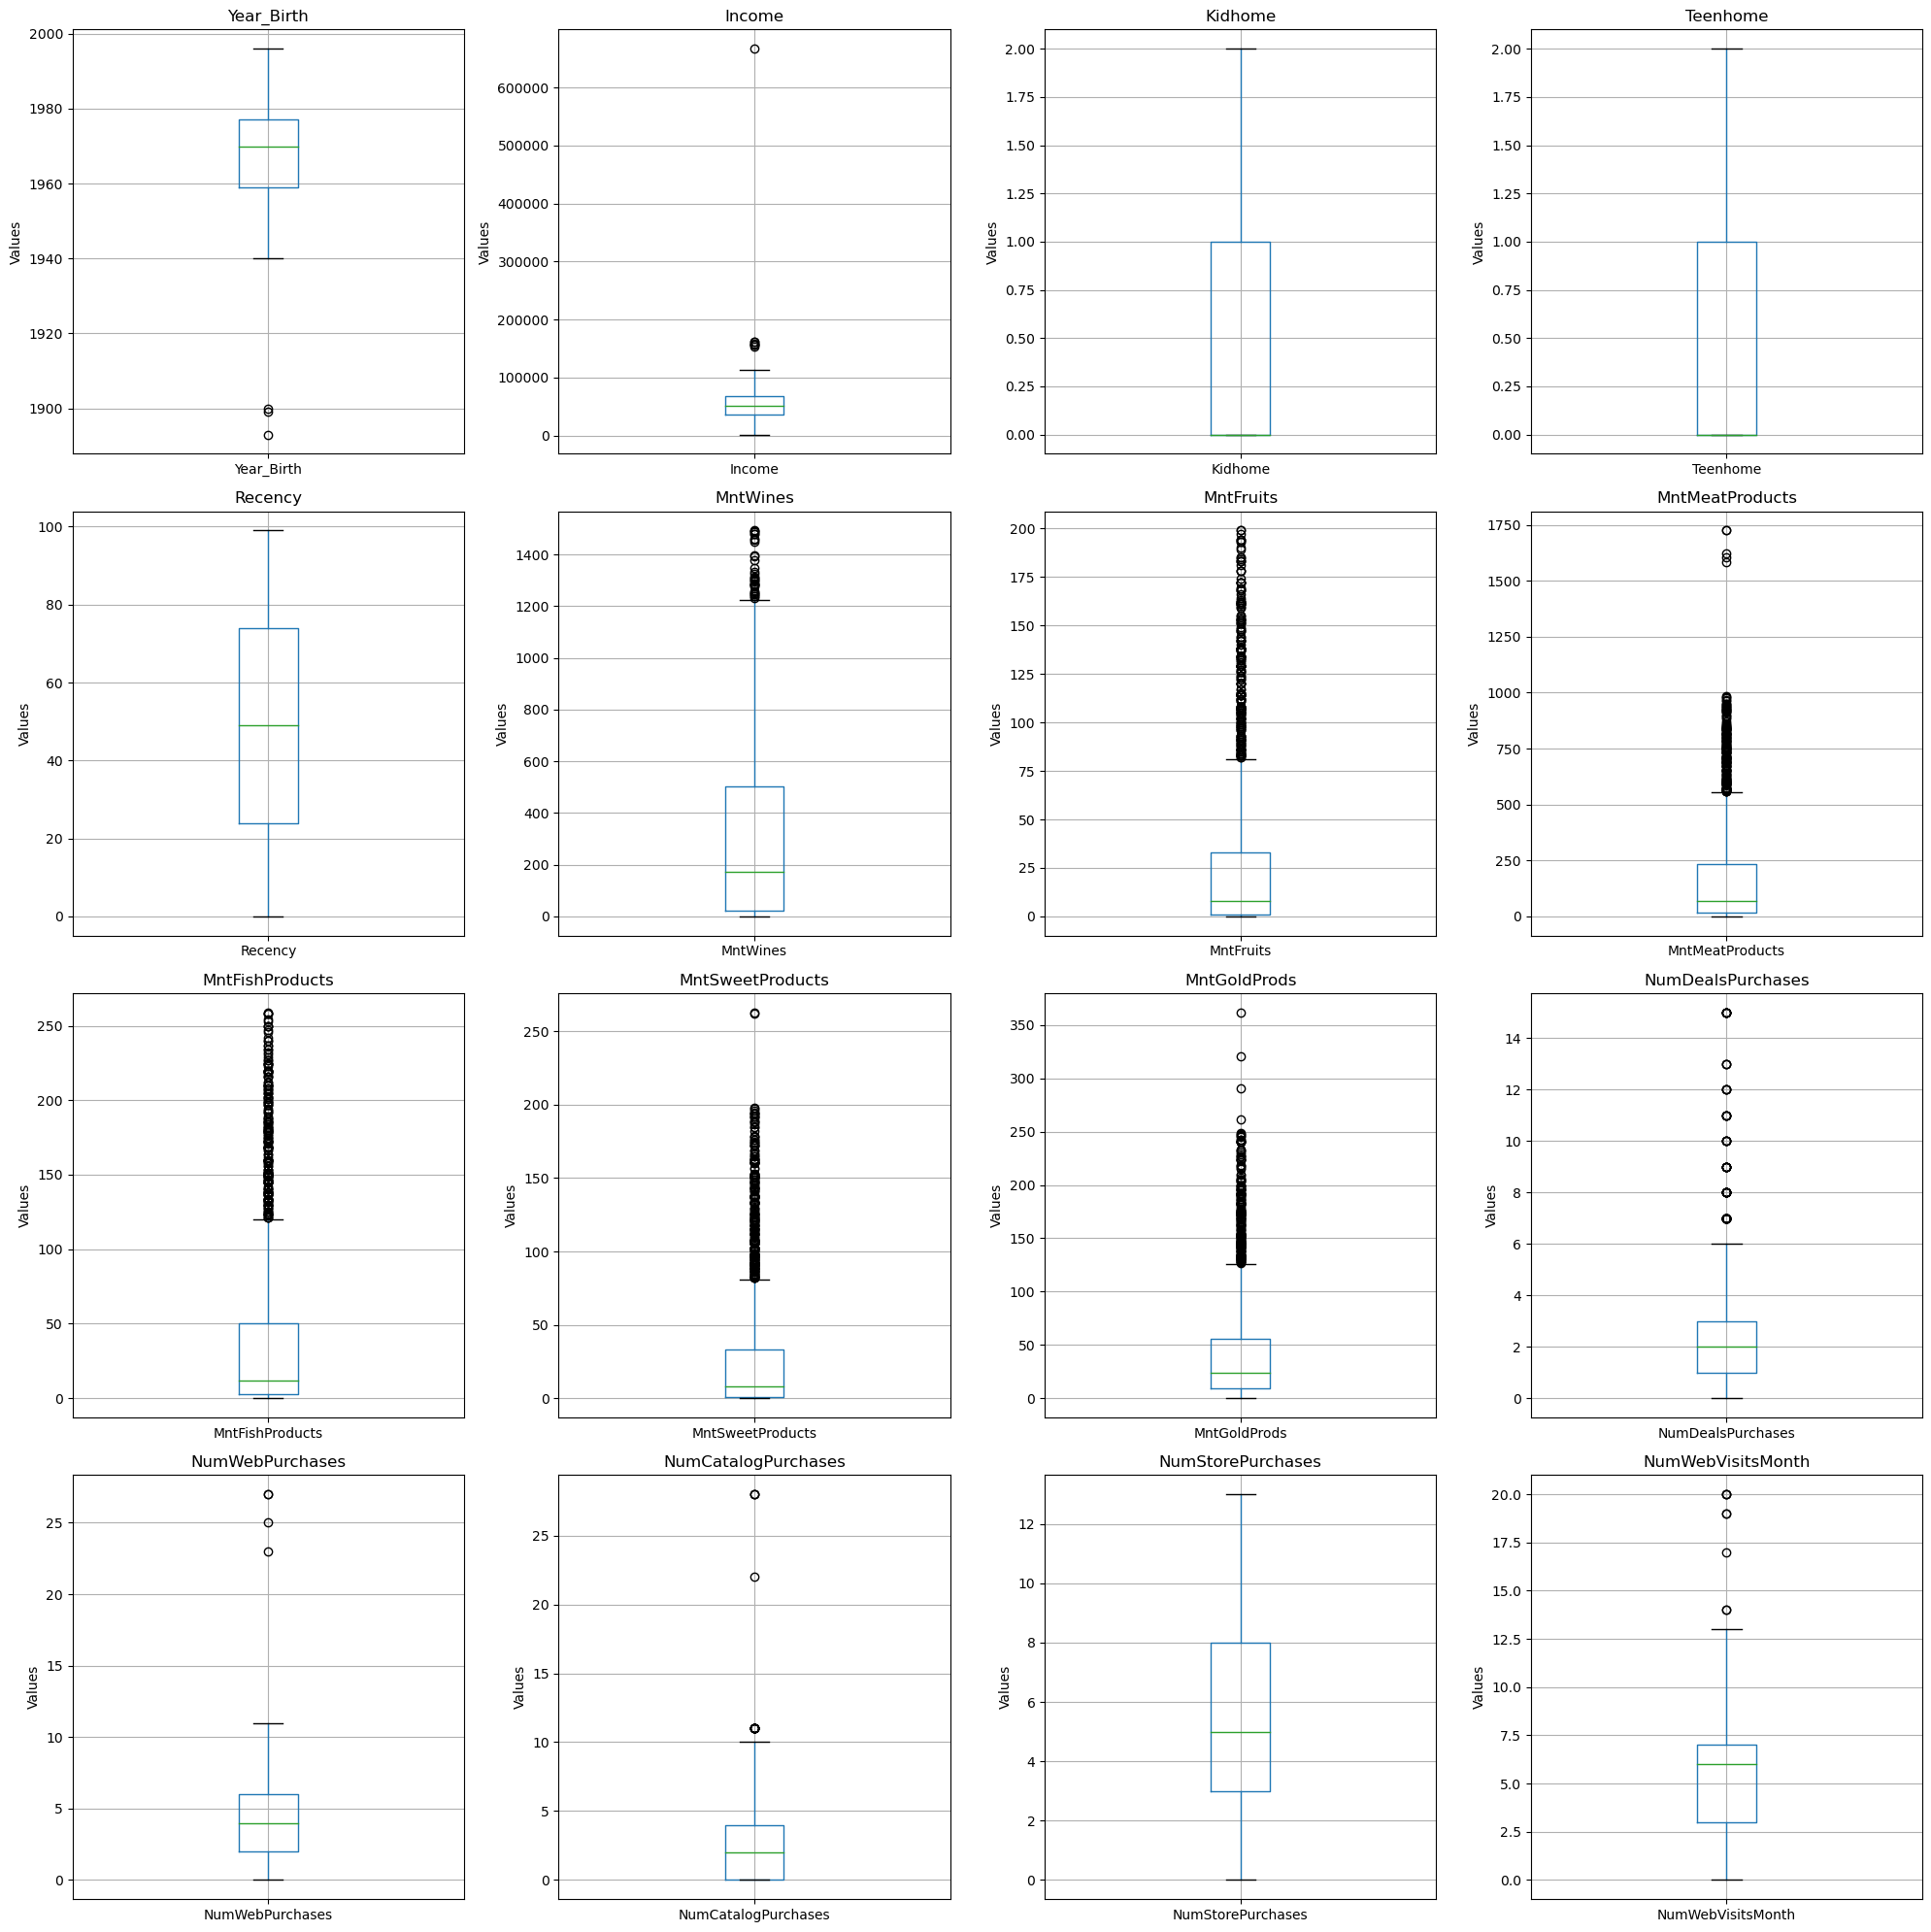

In [16]:
# Ploting box plots for continuous variables
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))
axes = axes.flatten()

for idx, var in enumerate(continuous_vars):
    consolidated_df.boxplot(column=var, ax=axes[idx])
    axes[idx].set_title(var)
    axes[idx].set_ylabel('Values')

plt.tight_layout()
plt.show()

In [17]:
# Checking for extreme values in specific continuous variables like 'Income', 'Recency', and spending on various categories

# Define the variables of interest
variables_of_interest = [
    'Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 
    'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'
]

# Calculating descriptive statistics for these variables to identify extreme values
extreme_values_report = pd.DataFrame(columns=[
    'Variable', 'Mean', 'StandardDeviation', 'Min', '25thPercentile', 
    '50thPercentile', '75thPercentile', 'Max', 'UpperFence'
])

for var in variables_of_interest:
    mean = consolidated_df[var].mean()
    std_dev = consolidated_df[var].std()
    min_val = consolidated_df[var].min()
    percentiles = consolidated_df[var].quantile([0.25, 0.5, 0.75]).values
    max_val = consolidated_df[var].max()
    iqr = percentiles[2] - percentiles[0]
    upper_fence = percentiles[2] + 1.5 * iqr
    
    extreme_values_report = pd.concat([extreme_values_report, pd.DataFrame({
        'Variable': [var],
        'Mean': [mean],
        'StandardDeviation': [std_dev],
        'Min': [min_val],
        '25thPercentile': [percentiles[0]],
        '50thPercentile': [percentiles[1]],
        '75thPercentile': [percentiles[2]],
        'Max': [max_val],
        'UpperFence': [upper_fence]
    })], ignore_index=True)

extreme_values_report

,Variable,Mean,StandardDeviation,Min,25thPercentile,50thPercentile,75thPercentile,Max,UpperFence
0,Income,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0,118350.5
1,Recency,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0,149.0
2,MntWines,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0,1225.0
3,MntFruits,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0,81.0
4,MntMeatProducts,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0,556.0
5,MntFishProducts,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0,120.5
6,MntSweetProducts,27.062946,41.280498,0.0,1.00,8.0,33.00,263.0,81.0
7,MntGoldProds,44.021875,52.167439,0.0,9.00,24.0,56.00,362.0,126.5


Income:
The maximum value is significantly higher than the upper fence, indicating the presence of extreme values.

Recency:
The maximum value of 99 days is within the upper fence, indicating no extreme values.

MntWines:
The maximum value of 1,493 is higher than the upper fence, indicating potential extreme values.

MntFruits:
The maximum value of 199 is higher than the upper fence, indicating potential extreme values.

MntMeatProducts:
The maximum value of 1,725 is higher than the upper fence, indicating potential extreme values.

MntFishProducts:
The maximum value of 259 is higher than the upper fence, indicating potential extreme values.

MntSweetProducts:
The maximum value of 263 is higher than the upper fence, indicating potential extreme values.

MntGoldProds:
The maximum value of 362 is higher than the upper fence, indicating potential extreme values.

# Business Analysis and Hypothesis (Task 2)
1. Generate and check hypothesis around Amount Spent on different categories and
response rate in different marketing campaigns.

In [19]:
import scipy.stats as stats

# spending categories and campaign response columns
spending_categories = ['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']
campaign_responses = ['Response','AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5']

# Create a summary of statistical tests results
hypothesis_results = pd.DataFrame(columns=['Campaign','Category','P-Value','Mean_Responder','Mean_Non_Responder'])

# Performing t-tests for each spending category against each campaign response
for response in campaign_responses:
    for category in spending_categories:
        responders = consolidated_df[consolidated_df[response] == 1][category]
        non_responders = consolidated_df[consolidated_df[response] == 0][category]
        t_stat, p_value = stats.ttest_ind(responders, non_responders, nan_policy='omit')
        
        hypothesis_results = pd.concat([hypothesis_results, pd.DataFrame({
            'Campaign': [response],
            'Category': [category],
            'P-Value': [p_value],
            'Mean_Responder': [responders.mean()],
            'Mean_Non_Responder': [non_responders.mean()]
        })], ignore_index=True)

hypothesis_results

,Campaign,Category,P-Value,Mean_Responder,Mean_Non_Responder
0,Response,MntWines,1.492531e-32,502.703593,269.104407
1,Response,MntFruits,2.683116e-09,38.203593,24.216684
2,Response,MntMeatProducts,8.296291e-30,294.353293,144.624344
3,Response,MntFishProducts,1.273473e-07,52.050898,34.980063
4,Response,MntSweetProducts,2.529654e-08,38.634731,25.035152
5,Response,MntGoldProds,2.972725e-11,61.446108,40.968520
6,AcceptedCmp1,MntWines,3.593498e-67,758.604167,272.698950
7,AcceptedCmp1,MntFruits,1.388559e-20,55.847222,24.272424
8,AcceptedCmp1,MntMeatProducts,5.158954e-51,433.638889,148.627863
9,AcceptedCmp1,MntFishProducts,3.855992e-36,91.861111,33.792462


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Preparing  the data for logistic regression
X = consolidated_df[spending_categories]
y = consolidated_df['Response']

# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initializing and train the logistic regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

#predictions
y_pred = log_reg.predict(X_test)

classification_report_result = classification_report(y_test, y_pred)

print(classification_report_result)

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       567
           1       0.67      0.04      0.07       105

    accuracy                           0.85       672
   macro avg       0.76      0.52      0.49       672
weighted avg       0.82      0.85      0.78       672



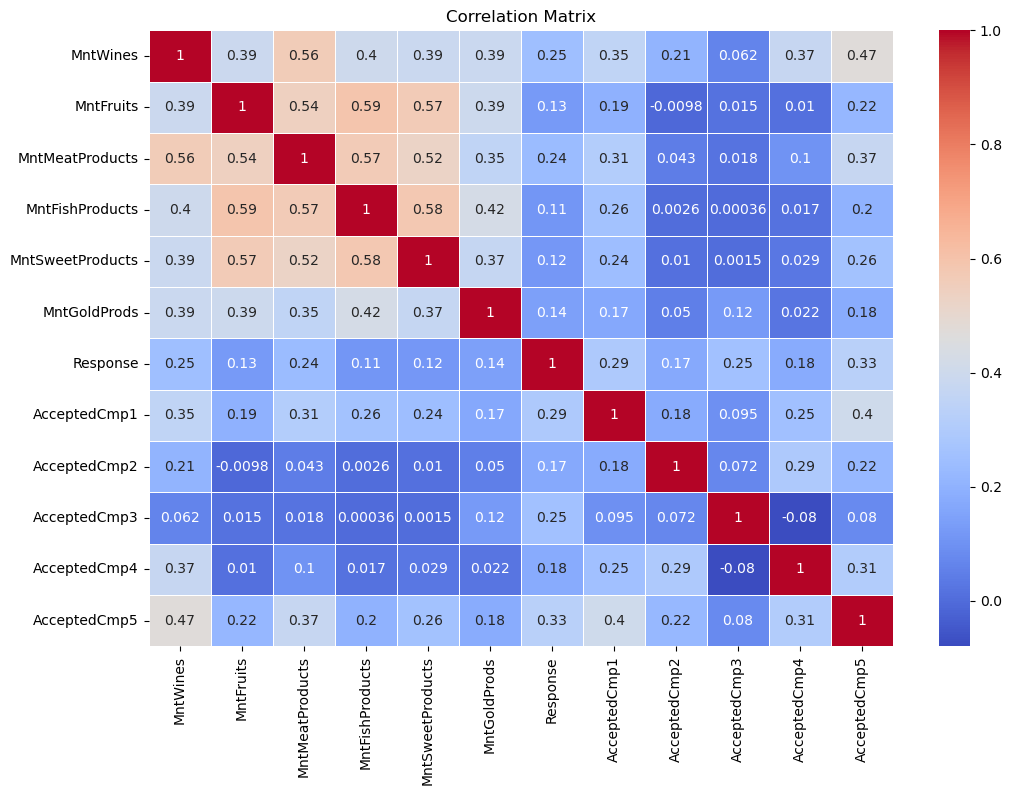

In [26]:
import seaborn as sns
# Correlation matrix to see relationships between spending and campaign responses
correlation_matrix = consolidated_df[spending_categories + campaign_responses].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [28]:
# Funnel analysis to see the percentage of unique customers who accepted each campaign
campaign_acceptance = {
    'AcceptedCmp1': consolidated_df['AcceptedCmp1'].sum(),
    'AcceptedCmp2': consolidated_df['AcceptedCmp2'].sum(),
    'AcceptedCmp3': consolidated_df['AcceptedCmp3'].sum(),
    'AcceptedCmp4': consolidated_df['AcceptedCmp4'].sum(),
    'AcceptedCmp5': consolidated_df['AcceptedCmp5'].sum(),
    'Response': consolidated_df['Response'].sum()
}

# Total number of unique customers
total_customers = consolidated_df['ID'].nunique()

# Calculating the percentage of unique customers who accepted each campaign
campaign_acceptance_percentage = {campaign: (count / total_customers) * 100 for campaign, count in campaign_acceptance.items()}

# Converting to DataFrame for better visualization
funnel_df = pd.DataFrame(list(campaign_acceptance_percentage.items()), columns=['Campaign', 'AcceptancePercentage'])
funnel_df

,Campaign,AcceptancePercentage
0,AcceptedCmp1,6.428571
1,AcceptedCmp2,1.339286
2,AcceptedCmp3,7.276786
3,AcceptedCmp4,7.455357
4,AcceptedCmp5,7.276786
5,Response,14.910714


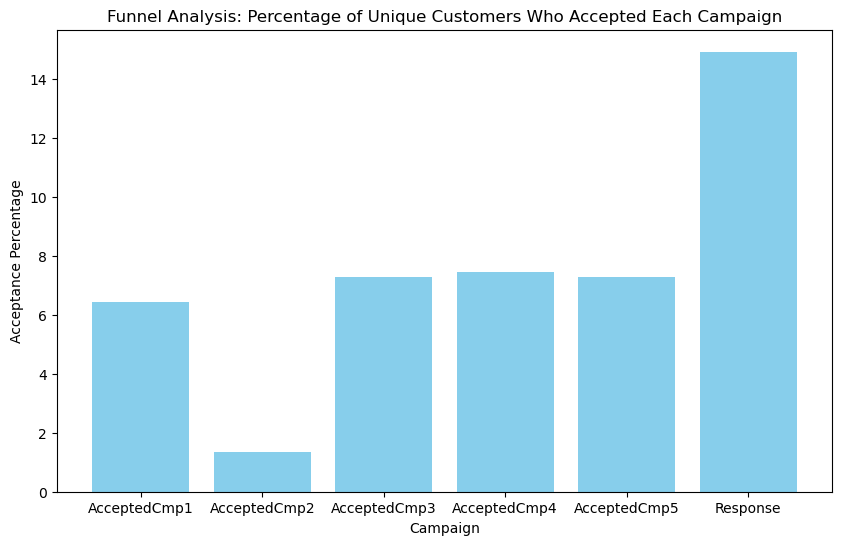

In [29]:
# Ploting the funnel analysis results
plt.figure(figsize=(10, 6))
plt.bar(funnel_df['Campaign'], funnel_df['AcceptancePercentage'], color='skyblue')
plt.title('Funnel Analysis: Percentage of Unique Customers Who Accepted Each Campaign')
plt.xlabel('Campaign')
plt.ylabel('Acceptance Percentage')
plt.show()

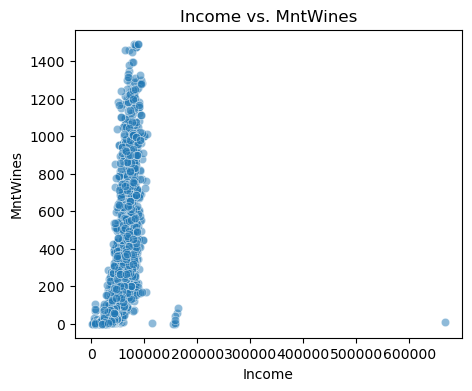

Correlation between Income and MntWines: 0.58


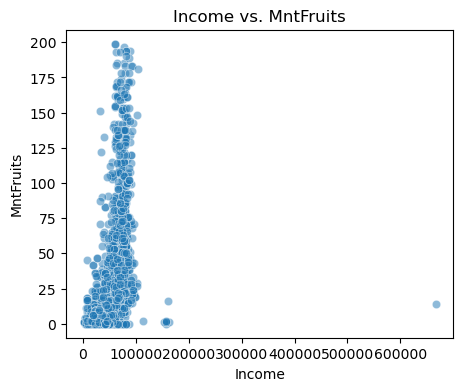

Correlation between Income and MntFruits: 0.43


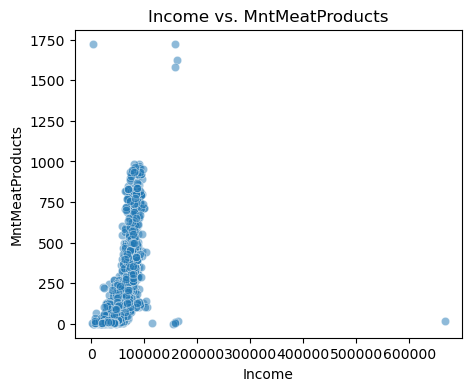

Correlation between Income and MntMeatProducts: 0.58


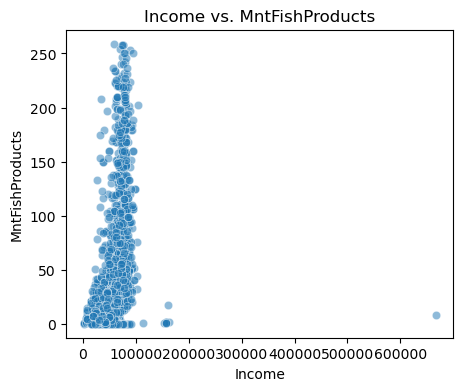

Correlation between Income and MntFishProducts: 0.44


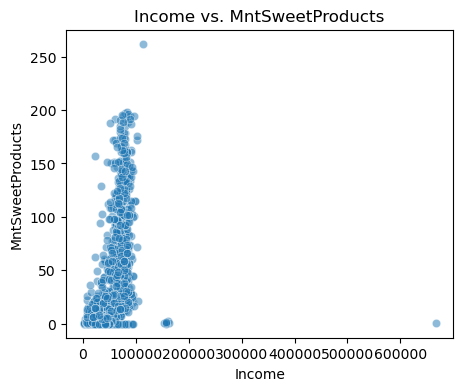

Correlation between Income and MntSweetProducts: 0.44


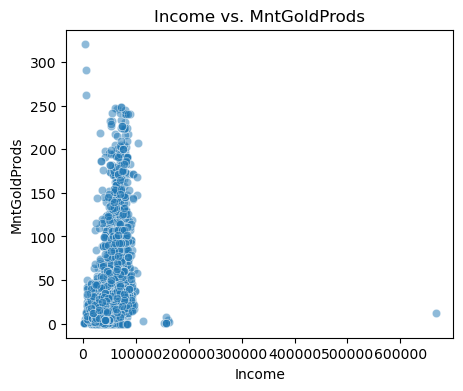

Correlation between Income and MntGoldProds: 0.33


In [36]:
# Ploting scatter plots and calculating correlation coefficients
for category in spending_categories:
    plt.figure(figsize=(5, 4))
    sns.scatterplot(x='Income', y=category, data=consolidated_df, alpha=0.5)
    plt.title(f'Income vs. {category}')
    plt.xlabel('Income')
    plt.ylabel(f'{category}')
    plt.show()
    
    correlation = consolidated_df[['Income', category]].corr().iloc[0, 1]
    print(f'Correlation between Income and {category}: {correlation:.2f}')